ARBOLES DE DECISIÓN


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [5]:
mydata = pd.read_csv("drug200.csv", delimiter = ",")
X = mydata[['Age','Sex','BP','Cholesterol','Na_to_K']].values

In [7]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

y = mydata["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(X,y, test_size=0.3)

In [11]:
## Construcción del modelo

drugTree = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
drugTree.fit(trainx,trainy)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
predicciones = drugTree.predict(testx)

In [14]:
print(predicciones[0:20])
print(testy[0:20])

['drugA' 'drugB' 'drugY' 'drugY' 'drugX' 'drugB' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugY' 'drugA' 'drugX' 'drugY' 'drugX' 'drugY' 'drugY' 'drugX'
 'drugY' 'drugX']
187    drugA
161    drugB
91     drugY
119    drugY
162    drugX
80     drugB
71     drugY
184    drugY
28     drugY
0      drugY
49     drugY
76     drugA
32     drugX
22     drugY
16     drugX
188    drugY
141    drugY
112    drugX
192    drugY
86     drugX
Name: Drug, dtype: object


In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt

metrics.accuracy_score(testy, predicciones)

1.0

[Text(0.625, 0.9, 'X[4] <= 14.829\nentropy = 1.976\nsamples = 140\nvalue = [13, 14, 13, 34, 66]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\nentropy = 1.852\nsamples = 74\nvalue = [13, 14, 13, 34, 0]'),
 Text(0.25, 0.5, 'X[0] <= 50.5\nentropy = 0.999\nsamples = 27\nvalue = [13, 14, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0]'),
 Text(0.75, 0.5, 'X[2] <= 1.5\nentropy = 0.851\nsamples = 47\nvalue = [0, 0, 13, 34, 0]'),
 Text(0.625, 0.3, 'X[3] <= 0.5\nentropy = 0.988\nsamples = 23\nvalue = [0, 0, 13, 10, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 66\nvalue = [0, 0, 0, 0, 66]')]

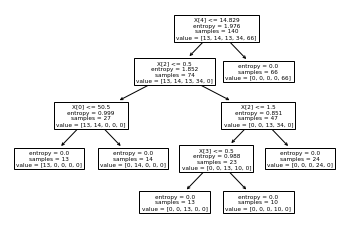

In [16]:
tree.plot_tree(drugTree)

K-MEDIAS

In [17]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

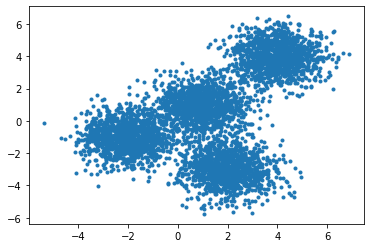

In [18]:
np.random.seed(0)
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], marker='.')


In [19]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

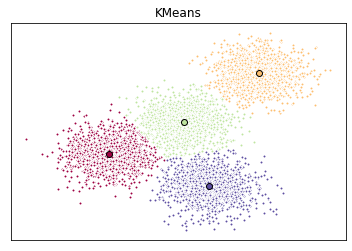

In [20]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

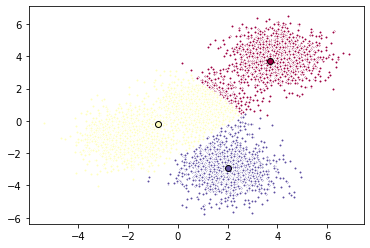

In [21]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()